Microbiome analysis

In [1]:
from preprocessing import readcounts_processing_pipeline, pheno_processing_pipeline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
readcounts_df_train = pd.read_csv('./train/readcounts_training.csv')
readcounts_df_train = readcounts_processing_pipeline(readcounts_df_train)

pheno_df_train = pd.read_csv('./train/pheno_training.csv')
pheno_df_train = pheno_processing_pipeline(pheno_df_train)

In [3]:
readcounts_df_train

Unnamed: 0,k__Archaea;p__;c__;o__;f__;g__;s__,k__Archaea;p__Candidatus_Korarchaeota;c__;o__;f__;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__;f__;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Acidilobales;f__Acidilobaceae;g__Acidilobus;s__Acidilobus_saccharovorans,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Acidilobales;f__Caldisphaeraceae;g__Caldisphaera;s__Caldisphaera_lagunensis,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Aeropyrum;s__Aeropyrum_camini,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Desulfurococcus;s__Desulfurococcus_amylolyticus,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Desulfurococcus;s__Desulfurococcus_mucosus,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Ignicoccus;s__Ignicoccus_hospitalis,...,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0460-1;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0462;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-1;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-2;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiBHN167;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Synechococcus_phage_S-CAM3;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Leptopilina_boulardi_filamentous_virus;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Mollivirus_sibericum;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Smacovirusgroup;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Torulaspora_delbrueckii_dsRNA_Mbarr-1_killer_virus;o__;f__;g__;s__
Simulated_328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1644,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1732,0,0,0,0,0,0,0,0,0,2,...,0,2,0,0,0,0,0,0,0,0
Simulated_1727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Simulated_1783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_3425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df = pheno_df_train.join(readcounts_df_train)

In [22]:
X = df.loc[:, readcounts_df_train.columns]
X_binary = X.copy()
X_binary = X_binary !=0
X_binary = X_binary.to_numpy()
X_binary.shape

 
y = df.Event

In [24]:
D = X_binary.sum(axis = 1)

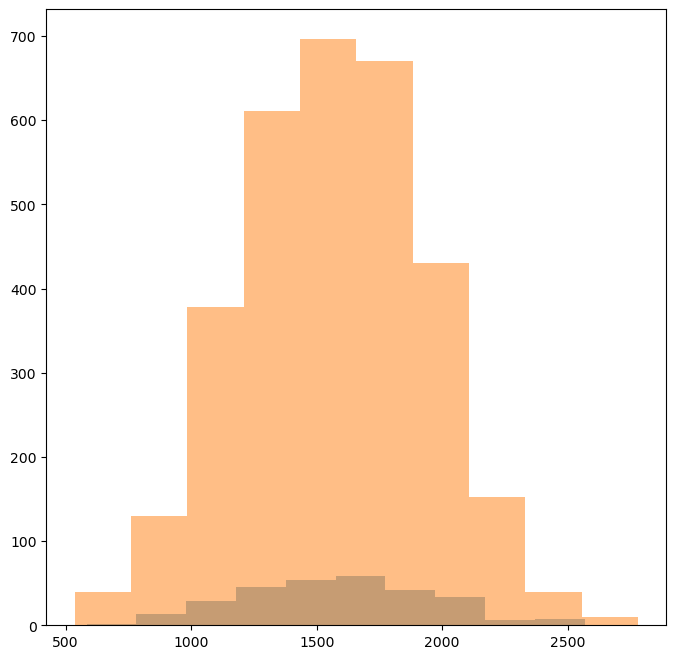

In [25]:
plt.figure(figsize=(8, 8))
plt.hist(D[y==True], alpha=0.5)
plt.hist(D[y==False], alpha=0.5)
plt.show()

The microbial beta diversity is compared using the Bray-Curtis (structure) and Jaccard (composition) dissimilarity.

In [28]:
X

Unnamed: 0,k__Archaea;p__;c__;o__;f__;g__;s__,k__Archaea;p__Candidatus_Korarchaeota;c__;o__;f__;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__;f__;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Acidilobales;f__Acidilobaceae;g__Acidilobus;s__Acidilobus_saccharovorans,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Acidilobales;f__Caldisphaeraceae;g__Caldisphaera;s__Caldisphaera_lagunensis,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__;s__,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Aeropyrum;s__Aeropyrum_camini,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Desulfurococcus;s__Desulfurococcus_amylolyticus,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Desulfurococcus;s__Desulfurococcus_mucosus,k__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;g__Ignicoccus;s__Ignicoccus_hospitalis,...,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0460-1;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0462;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-1;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiARI0468-2;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Streptococcus_phage_phiBHN167;o__;f__;g__;s__,k__Viruses;p__unclassified_bacterial_viruses;c__Synechococcus_phage_S-CAM3;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Leptopilina_boulardi_filamentous_virus;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Mollivirus_sibericum;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Smacovirusgroup;o__;f__;g__;s__,k__Viruses;p__unclassified_viruses;c__Torulaspora_delbrueckii_dsRNA_Mbarr-1_killer_virus;o__;f__;g__;s__
Simulated_328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1644,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1732,0,0,0,0,0,0,0,0,0,2,...,0,2,0,0,0,0,0,0,0,0
Simulated_1727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Simulated_1783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_3425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Simulated_1592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from skbio.diversity import alpha_diversity

data = X.to_numpy()
ids = X.index
adiv_obs_otus = alpha_diversity('observed_otus', data, ids)

adiv_obs_otus

Simulated_328     2078
Simulated_1644     771
Simulated_1710    1680
Simulated_1732    2039
Simulated_1727    1822
                  ... 
Simulated_1783    2299
Simulated_3425    1823
Simulated_1789    1468
Simulated_1592    1638
Simulated_1731    2260
Length: 3448, dtype: int64

(array([ 42., 144., 409., 668., 758., 732., 471., 167.,  45.,  12.]),
 array([ 535. ,  759.6,  984.2, 1208.8, 1433.4, 1658. , 1882.6, 2107.2,
        2331.8, 2556.4, 2781. ]),
 <BarContainer object of 10 artists>)

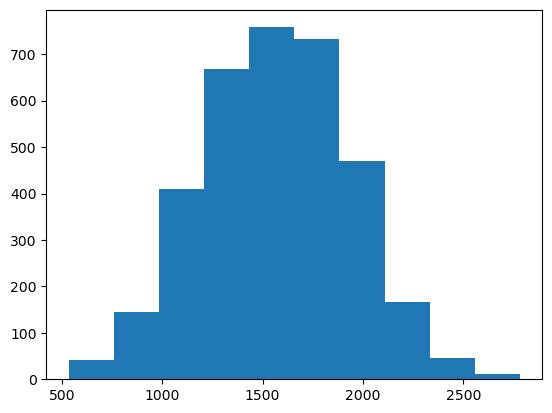

In [31]:
plt.hist(adiv_obs_otus)

In [32]:
from skbio.diversity import beta_diversity

bc_dm = beta_diversity("braycurtis", data, ids)

print(bc_dm)

3448x3448 distance matrix
IDs:
'Simulated_328', 'Simulated_1644', 'Simulated_1710', 'Simulated_1732', ...
Data:
[[0.         0.85385134 0.40952243 ... 0.70520199 0.69789442 0.47243088]
 [0.85385134 0.         0.85144151 ... 0.78991317 0.78894621 0.80815248]
 [0.40952243 0.85144151 0.         ... 0.70914592 0.66948011 0.55934315]
 ...
 [0.70520199 0.78991317 0.70914592 ... 0.         0.44741703 0.76703105]
 [0.69789442 0.78894621 0.66948011 ... 0.44741703 0.         0.74176158]
 [0.47243088 0.80815248 0.55934315 ... 0.76703105 0.74176158 0.        ]]


Compute the Shannon diversity index

Comparison of the community structures between the two groups based on PERMANOVA

In [4]:
from sklearn.manifold import TSNE
 

(3448, 2)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [7]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50)
svd.fit(X_scaled)

TruncatedSVD(n_components=50)

In [8]:
X_transformed = svd.transform(X_scaled)

In [9]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X_transformed)
X_embedded.shape

(3448, 2)

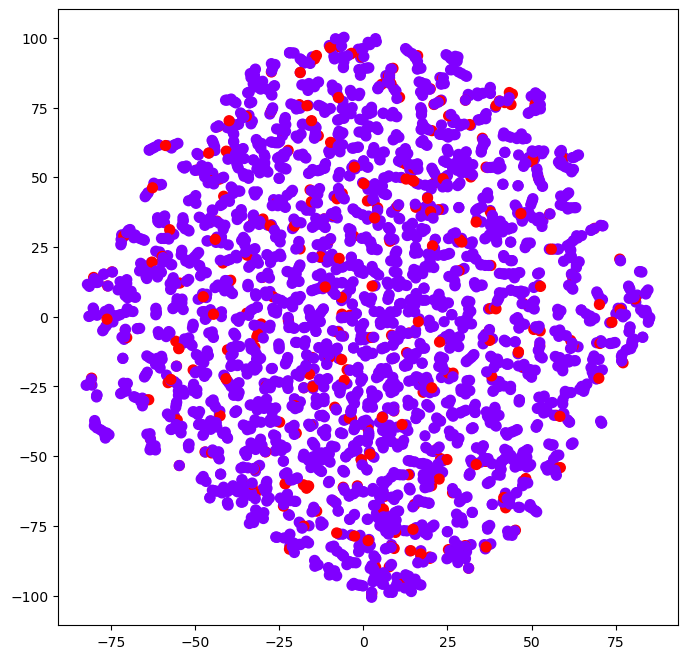

In [10]:
# Scatter plot of X_embedded
plt.figure(figsize=(8, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=50, cmap='rainbow')
